In [1]:
import pandas as pd
import seaborn as sns

In [2]:
statistics = pd.read_csv("Dataset/istatistikler.csv")

news = pd.read_csv("Dataset/haberler.csv")

<Axes: xlabel='target', ylabel='count'>

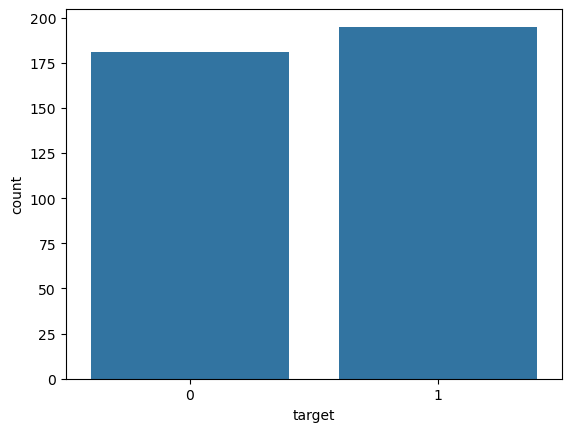

In [3]:
# target 
sns.countplot(data=statistics, x="target")

In [9]:
print(news.shape)
news.head()

(10331, 7)


,title,text,clean_text,date,year,month,day
0,Savunmada Gelişenler ve yerinde sayanlar,Lefteris Moutis/moutis@eurohoops.net\nEurohoop...,lefteris eurohoops olarak eurolig deki takımla...,2015-03-02 13:56:00,2015,3,2
1,Galatasaray Fenerbahçe’ye Teslim Olmuyor,By Eurohoops team/info@eurohoops.netGalatasara...,galatasaraydüşüyor ama asla teslim olmuyor. si...,2015-05-24 17:10:00,2015,5,24
2,Avrupa’da Maç Programı ve Yayın Akışı,By Eurohoops Team/info@eurohoops.net\nEuroleag...,euroleague ve eurocup ta mücadele edecek takım...,2015-10-26 12:46:00,2015,10,26
3,“Atılan Üçlükler Fenerbahçe’yi Zor Durumda Bır...,"Torku Konyaspor koçu Aziz Bekir, maç sonu yapt...","torku konyaspor koçu aziz bekir, maç sonu yapt...",2015-10-26 21:06:00,2015,10,26
4,Fenerbahçe Tarihinde İlk!,By Eurohoops Team/info@eurohoops.net\nFenerbah...,"fenerbahçe, torku konyaspor maçında tarihinde ...",2015-10-27 10:34:00,2015,10,27


In [10]:
print(statistics.shape)
statistics.head()

(376, 20)


,Opposing Team,IsHome,Points,Performance Index Rating,Two-point %,Three-point %,Free-throw %,Offensive rebounds,Defensive rebounds,Total rebounds,Assists,Steals,Blocks,Turnovers,Day,Month,Year,Date,target,combined_news
0,CSKA Moscow,1,81.0,76.0,42.9,38.5,62.5,13.0,30.0,43.0,20.0,5.0,5.0,19.0,2,1,2015,2015-01-02,0,no_news_available
1,Nizhny Novgorod,0,78.0,80.0,56.9,33.3,35.7,12.0,21.0,33.0,8.0,6.0,3.0,4.0,9,1,2015,2015-01-09,0,no_news_available
2,Olympiacos Piraeus,1,68.0,65.0,51.4,39.1,45.5,7.0,19.0,26.0,14.0,5.0,6.0,11.0,16,1,2015,2015-01-16,0,no_news_available
3,EA7 Emporio Armani Milan,0,82.0,99.0,63.0,21.1,85.7,13.0,20.0,33.0,18.0,9.0,3.0,9.0,22,1,2015,2015-01-22,1,no_news_available
4,Unicaja Malaga,0,68.0,81.0,57.9,27.8,69.2,8.0,30.0,38.0,16.0,9.0,3.0,15.0,30,1,2015,2015-01-30,0,no_news_available


In [6]:
statistics['Date'] = pd.to_datetime(statistics['Date'])
news['date'] = pd.to_datetime(news['date'])

In [7]:
from datetime import timedelta

def get_related_news(game_date, news_df, window_days=3):
    # Maçtan önceki pencereyi belirle
    start_date = game_date - timedelta(days=window_days)
    end_date = game_date - timedelta(days=1) # Maç gününü dahil etmiyoruz (garanti olsun)
    
    # O tarihler arasındaki haberleri filtrele
    mask = (news_df['date'] >= start_date) & (news_df['date'] <= end_date)
    related_news = news_df.loc[mask, 'clean_text'].tolist()
    
    # Haberleri tek bir metin olarak birleştir
    if len(related_news) > 0:
        return " ".join(related_news)
    else:
        return "no_news_available"

# Yeni sütunu oluştur
statistics['combined_news'] = statistics['Date'].apply(lambda x: get_related_news(x, news))

In [8]:
with pd.option_context('display.max_colwidth', None):
    display(statistics.iloc[100])

Opposing Team                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           